In [ ]:
!pip install shap
# 런타임 다시 시작

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from IPython.display import Image
from numpy import interp

# AutoML

## PyCaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.

In [ ]:
from pycaret.datasets import get_data
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [ ]:
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
print(data['left'].value_counts())
print(data['left'].value_counts(normalize = True))

left
0    11428
1     3571
Name: count, dtype: int64
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


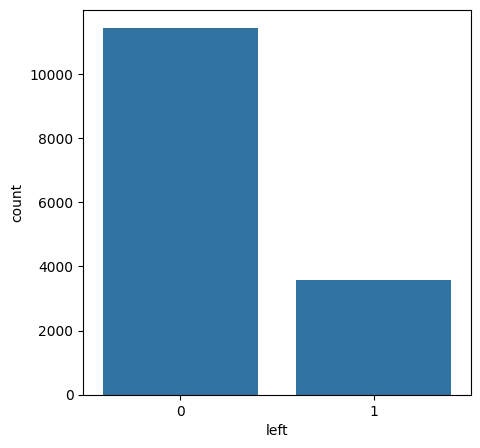

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'left', data = data, order = data['left'].value_counts().index)
plt.show()

<Axes: >

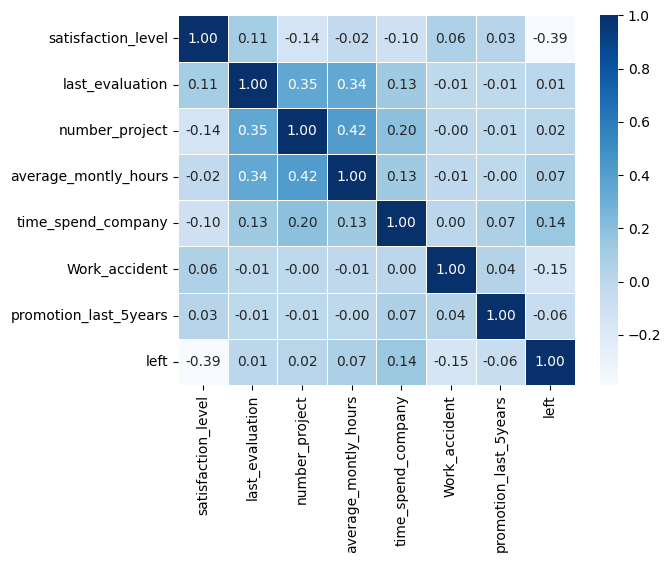

In [ ]:
sns.heatmap(data = data.drop(['salary', 'department'], axis=1).corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 타이타닉 데이터

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 준비

In [ ]:
from pycaret.classification import *
setup_clf = setup(df, target = 'survived', session_id = 42)

,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 29)"
5,Transformed train set shape,"(623, 29)"
6,Transformed test set shape,"(268, 29)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,79.6%


In [ ]:
from pycaret.classification import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df, target = 'survived',
                  train_size = 0.7,
                  ignore_features = ['pclass', 'adult_male', 'deck', 'embark_town', 'alive'],
                  numeric_features = ['age','fare'],
                  categorical_features = ['sex', 'embarked', 'class', 'who'],
                  # encoding_method = None,
                  normalize = True,
                  normalize_method = 'zscore',
                  # remove_outliers = True,
                  # feature_selection = True,
                  # feature_selection_method = 'classic',
                  # fix_imbalance = True,
                  # fix_imbalance_method = 'SMOTE',
                  n_jobs = - 1,
                  session_id = 42)

,Description,Value
0,Session id,42
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 16)"
5,Transformed train set shape,"(623, 16)"
6,Transformed test set shape,"(268, 16)"
7,Ignore features,5
8,Numeric features,2
9,Categorical features,4


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
748,male,19.0,1,0,53.099998,S,First,man,False
45,male,NaN,0,0,8.050000,S,Third,man,True
28,female,NaN,0,0,7.879200,Q,Third,woman,True
633,male,NaN,0,0,0.000000,S,First,man,True
403,male,28.0,1,0,15.850000,S,Third,man,False
...,...,...,...,...,...,...,...,...,...
184,female,4.0,0,2,22.025000,S,Third,child,False
607,male,27.0,0,0,30.500000,S,First,man,True
624,male,21.0,0,0,16.100000,S,Third,man,True
103,male,33.0,0,0,8.654200,S,Third,man,True


In [ ]:
get_config('y')

748    0
45     0
28     1
633    0
403    0
      ..
184    1
607    1
624    0
103    0
387    1
Name: survived, Length: 891, dtype: int8

In [ ]:
get_config('X_train')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
748,male,19.0,1,0,53.099998,S,First,man,False
45,male,NaN,0,0,8.050000,S,Third,man,True
28,female,NaN,0,0,7.879200,Q,Third,woman,True
633,male,NaN,0,0,0.000000,S,First,man,True
403,male,28.0,1,0,15.850000,S,Third,man,False
...,...,...,...,...,...,...,...,...,...
476,male,34.0,1,0,21.000000,S,Second,man,False
190,female,32.0,0,0,13.000000,S,Second,woman,True
736,female,48.0,1,3,34.375000,S,Third,woman,False
462,male,47.0,0,0,38.500000,S,First,man,True


In [ ]:
get_config('y_train')

748    0
45     0
28     1
633    0
403    0
      ..
476    0
190    1
736    0
462    0
136    1
Name: survived, Length: 623, dtype: int8

In [ ]:
get_config('X_test')

,sex,age,sibsp,parch,fare,embarked,class,who,alone
625,male,61.0,0,0,32.320801,S,First,man,True
566,male,19.0,0,0,7.895800,S,Third,man,True
459,male,NaN,0,0,7.750000,Q,Third,man,True
804,male,27.0,0,0,6.975000,S,Third,man,True
338,male,45.0,0,0,8.050000,S,Third,man,True
...,...,...,...,...,...,...,...,...,...
184,female,4.0,0,2,22.025000,S,Third,child,False
607,male,27.0,0,0,30.500000,S,First,man,True
624,male,21.0,0,0,16.100000,S,Third,man,True
103,male,33.0,0,0,8.654200,S,Third,man,True


In [ ]:
get_config('y_test')

625    0
566    0
459    0
804    1
338    1
      ..
184    1
607    1
624    0
103    0
387    1
Name: survived, Length: 268, dtype: int8

In [ ]:
get_config('X_train_transformed')

,sex,age,sibsp,parch,fare,embarked_S,embarked_Q,embarked_C,class_First,class_Third,class_Second,who_man,who_woman,who_child,alone
748,0.731083,-8.476280e-01,0.562957,-0.448665,0.465738,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,-1.284937
45,0.731083,4.488517e-08,-0.474682,-0.448665,-0.478269,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
28,-1.367833,4.488517e-08,-0.474682,-0.448665,-0.481848,-1.587380,3.279439,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,1.526942,-0.308064,0.778248
633,0.731083,4.488517e-08,-0.474682,-0.448665,-0.646954,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
403,0.731083,-1.569695e-01,0.562957,-0.448665,-0.314823,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,-1.284937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.731083,3.034695e-01,0.562957,-0.448665,-0.206906,0.629969,-0.304930,-0.498495,-0.555719,-1.11763,1.947385,0.794286,-0.654904,-0.308064,-1.284937
190,-1.367833,1.499898e-01,-0.474682,-0.448665,-0.374544,0.629969,-0.304930,-0.498495,-0.555719,-1.11763,1.947385,-1.258993,1.526942,-0.308064,0.778248
736,-1.367833,1.377827e+00,0.562957,3.119650,0.073362,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,1.526942,-0.308064,-1.284937
462,0.731083,1.301087e+00,-0.474682,-0.448665,0.159800,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248


In [ ]:
get_config('X_test_transformed')

,sex,age,sibsp,parch,fare,embarked_S,embarked_Q,embarked_C,class_First,class_Third,class_Second,who_man,who_woman,who_child,alone
625,0.731083,2.375445e+00,-0.474682,-0.448665,0.030317,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
566,0.731083,-8.476280e-01,-0.474682,-0.448665,-0.481501,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
459,0.731083,4.488517e-08,-0.474682,-0.448665,-0.484556,-1.587380,3.279439,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
804,0.731083,-2.337093e-01,-0.474682,-0.448665,-0.500796,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
338,0.731083,1.147608e+00,-0.474682,-0.448665,-0.478269,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1.367833,-1.998726e+00,-0.474682,1.930212,-0.185428,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,-1.258993,-0.654904,3.246080,-1.284937
607,0.731083,-2.337093e-01,-0.474682,-0.448665,-0.007837,0.629969,-0.304930,-0.498495,1.799471,-1.11763,-0.513509,0.794286,-0.654904,-0.308064,0.778248
624,0.731083,-6.941483e-01,-0.474682,-0.448665,-0.309584,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248
103,0.731083,2.267297e-01,-0.474682,-0.448665,-0.465609,0.629969,-0.304930,-0.498495,-0.555719,0.89475,-0.513509,0.794286,-0.654904,-0.308064,0.778248


In [ ]:
get_config('variable_and_property_keys')

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['age', 'fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sex', 'embarked', '...
                                    include=['embarked', 'class', 'who'],
                                    transformer=OneHotEncoder(cols=['embarked',
                                                                    'class',
                                                                    'who'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)))],
         verbose=False)

### 모델 비교

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8251,0.8657,0.7199,0.8070,0.7585,0.6226,0.6273,0.2500
lightgbm,Light Gradient Boosting Machine,0.8219,0.8684,0.7453,0.7845,0.7605,0.6195,0.6238,0.6830
lr,Logistic Regression,0.8171,0.8558,0.7201,0.7923,0.7505,0.6071,0.6125,0.8710
ridge,Ridge Classifier,0.8138,0.8597,0.7201,0.7804,0.7473,0.6006,0.6034,0.1280
lda,Linear Discriminant Analysis,0.8138,0.8598,0.7201,0.7804,0.7473,0.6006,0.6034,0.1290
rf,Random Forest Classifier,0.8124,0.8478,0.7284,0.7792,0.7484,0.5996,0.6048,0.4730
ada,Ada Boost Classifier,0.8089,0.8429,0.7371,0.7669,0.7467,0.5941,0.5996,0.2250
et,Extra Trees Classifier,0.8059,0.8328,0.7370,0.7625,0.7458,0.5894,0.5933,0.4280
knn,K Neighbors Classifier,0.8026,0.8375,0.6909,0.7758,0.7260,0.5735,0.5800,0.1480
nb,Naive Bayes,0.7993,0.8451,0.7576,0.7339,0.7435,0.5793,0.5816,0.1280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare_models(include = ['lr','lightgbm','rf'], sort='F1')
# compare_models(exclude = ['catboost'], sort='F1')
# compare_models(sort='Accuracy', fold = 5, n_select = 5, budget_time = 0.5)

In [ ]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 모델 분석

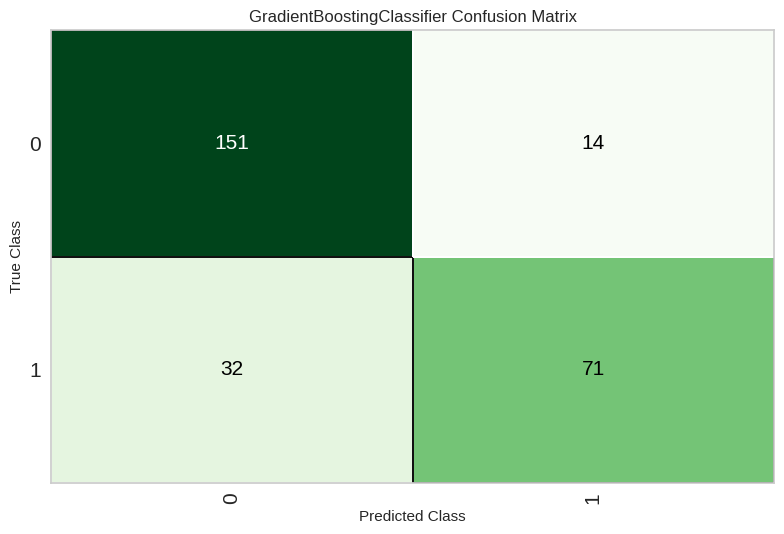

In [ ]:
plot_model(best, plot = 'confusion_matrix')

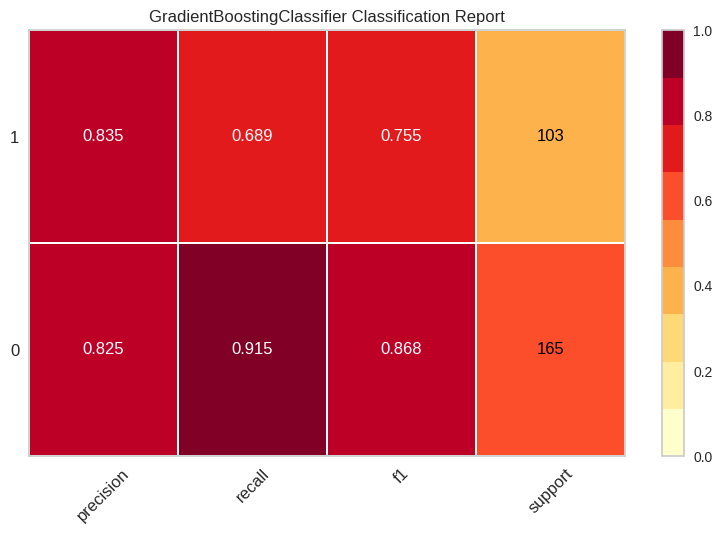

In [ ]:
plot_model(best, plot = 'class_report')

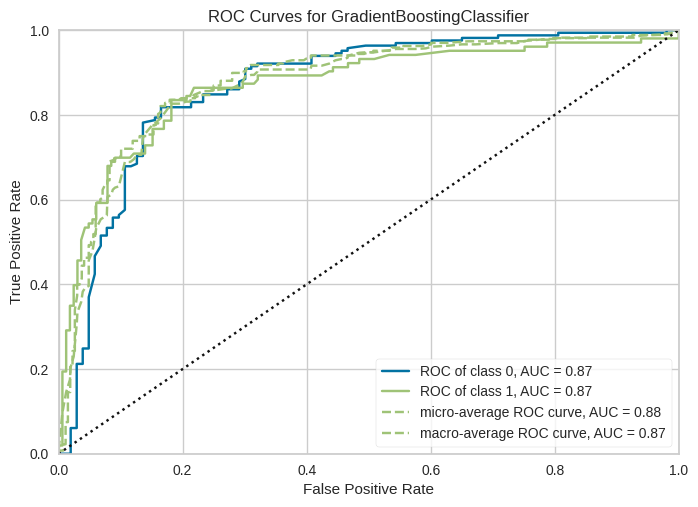

In [ ]:
plot_model(best, plot = 'auc')

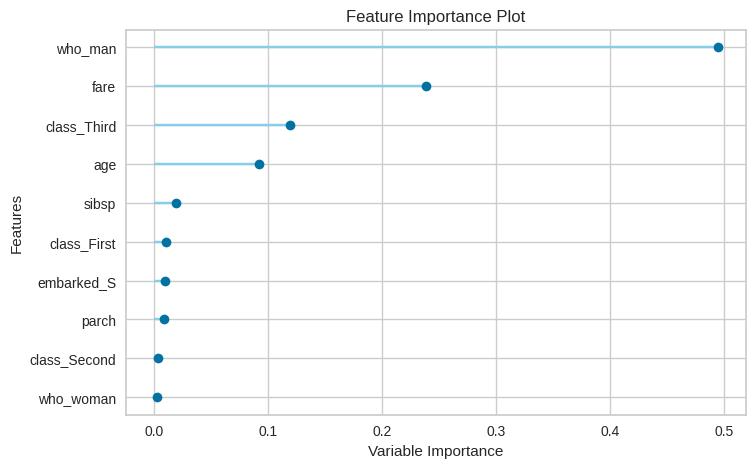

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 예측

In [ ]:
pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8284,0.8697,0.6893,0.8353,0.7553,0.6250,0.6318


In [ ]:
pred.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,prediction_label,prediction_score
625,male,61.0,0,0,32.320801,S,First,man,True,0,0,0.8790
566,male,19.0,0,0,7.895800,S,Third,man,True,0,0,0.9345
459,male,NaN,0,0,7.750000,Q,Third,man,True,0,0,0.7817
804,male,27.0,0,0,6.975000,S,Third,man,True,1,0,0.9807
338,male,45.0,0,0,8.050000,S,Third,man,True,1,0,0.9215


In [ ]:
new_data = df.copy()
new_data = new_data.drop(['survived', 'pclass', 'adult_male', 'deck', 'embark_town', 'alive'], axis=1)
new_data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,male,22.0,1,0,7.2500,S,Third,man,False
1,female,38.0,1,0,71.2833,C,First,woman,False
2,female,26.0,0,0,7.9250,S,Third,woman,True
3,female,35.0,1,0,53.1000,S,First,woman,False
4,male,35.0,0,0,8.0500,S,Third,man,True


In [ ]:
new_pred = predict_model(best, data = new_data)
new_pred.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,prediction_label,prediction_score
0,male,22.0,1,0,7.250000,S,Third,man,False,0,0.8657
1,female,38.0,1,0,71.283302,C,First,woman,False,1,0.9725
2,female,26.0,0,0,7.925000,S,Third,woman,True,1,0.5202
3,female,35.0,1,0,53.099998,S,First,woman,False,1,0.9657
4,male,35.0,0,0,8.050000,S,Third,man,True,0,0.9027


### 모델 해석

In [ ]:
clf = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8707,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.7302,0.8301,0.5417,0.6842,0.6047,0.4040,0.4104
2,0.7778,0.8061,0.7083,0.7083,0.7083,0.5288,0.5288
3,0.8710,0.9331,0.8696,0.8000,0.8333,0.7284,0.7301
4,0.8065,0.8925,0.6250,0.8333,0.7143,0.5724,0.5860
5,0.8710,0.8816,0.7917,0.8636,0.8261,0.7238,0.7256
6,0.7419,0.8717,0.7500,0.6429,0.6923,0.4723,0.4765
7,0.7742,0.7588,0.6667,0.7273,0.6957,0.5167,0.5179
8,0.8387,0.9079,0.8333,0.7692,0.8000,0.6652,0.6667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

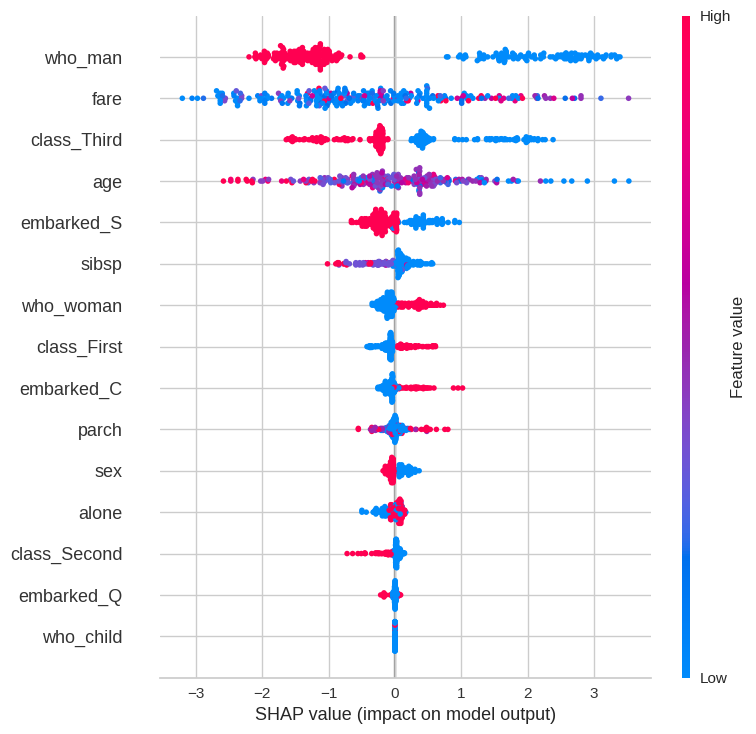

In [ ]:
interpret_model(clf, plot = 'summary')

In [ ]:
help(interpret_model)

Help on function interpret_model in module pycaret.classification.functional:

interpret_model(estimator, plot: str = 'summary', feature: Optional[str] = None, observation: Optional[int] = None, use_train_data: bool = False, X_new_sample: Optional[pandas.core.frame.DataFrame] = None, y_new_sample: Optional[pandas.core.frame.DataFrame] = None, save: Union[str, bool] = False, **kwargs)
    This function takes a trained model object and returns an interpretation plot
    based on the test / hold-out set.
    
    This function is implemented based on the SHAP (SHapley Additive exPlanations),
    which is a unified approach to explain the output of any machine learning model.
    SHAP connects game theory with local explanations.
    
    For more information: https://shap.readthedocs.io/en/latest/
    
    For more information on Partial Dependence Plot: https://github.com/SauceCat/PDPbox
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_d

### 모델 튜닝 및 앙상블

In [ ]:
# 모델 튜닝
tuned_model = tune_model(best, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8611,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.8095,0.8873,0.6250,0.8333,0.7143,0.5758,0.5892
2,0.8413,0.8873,0.6667,0.8889,0.7619,0.6465,0.6615
3,0.8548,0.9013,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8226,0.8311,0.5833,0.9333,0.7179,0.5984,0.6335
5,0.9032,0.9063,0.7917,0.9500,0.8636,0.7896,0.7975
6,0.7903,0.8969,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8387,0.8076,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8548,0.8558,0.7083,0.8947,0.7907,0.6819,0.6928


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=8,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_samples_leaf=1,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=110, n_iter_no_change=None,
                           random_state=42, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# 모델 앙상블
ensemble_model = ensemble_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8921,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.7619,0.8654,0.6250,0.7143,0.6667,0.4828,0.4854
2,0.8730,0.8488,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.8548,0.9331,0.8261,0.7917,0.8085,0.6917,0.6921
4,0.8226,0.8750,0.6250,0.8824,0.7317,0.6049,0.6249
5,0.8710,0.8750,0.7917,0.8636,0.8261,0.7238,0.7256
6,0.8065,0.8991,0.7083,0.7727,0.7391,0.5857,0.5871
7,0.8387,0.7511,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.8710,0.9068,0.7917,0.8636,0.8261,0.7238,0.7256


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
ensemble_model

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='log_loss',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                       n_iter_no_change=None,
                                                       random_state=42,
                                                       subsample=1.0,
                                                       tol=0.0001,
                                                       validation_fraction=0.1,
                                                       verbose=0,
                                                       warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [ ]:
# 최종 모델 훈련
final_model = finalize_model(best)
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 모델 개수 선택하여 비교

In [ ]:
model = compare_models(sort='Accuracy', fold = 5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8395,0.8733,0.7363,0.8279,0.7787,0.6535,0.6569,0.2620
lightgbm,Light Gradient Boosting Machine,0.8282,0.8624,0.7154,0.8203,0.7623,0.6287,0.6342,2.2100
lda,Linear Discriminant Analysis,0.8169,0.8582,0.7193,0.7869,0.7502,0.6064,0.6091,0.1360
lr,Logistic Regression,0.8154,0.8549,0.7192,0.7857,0.7484,0.6032,0.6071,0.1440
ridge,Ridge Classifier,0.8153,0.8582,0.7152,0.7862,0.7475,0.6026,0.6056,0.1360
ada,Ada Boost Classifier,0.8138,0.8450,0.7486,0.7642,0.7542,0.6045,0.6068,0.2380
rf,Random Forest Classifier,0.8090,0.8498,0.7363,0.7628,0.7479,0.5944,0.5961,0.3500
knn,K Neighbors Classifier,0.8089,0.8425,0.7028,0.7814,0.7379,0.5884,0.5926,0.2440
xgboost,Extreme Gradient Boosting,0.8025,0.8522,0.7237,0.7570,0.7376,0.5795,0.5823,0.2340
nb,Naive Bayes,0.7993,0.8455,0.7613,0.7307,0.7442,0.5793,0.5813,0.2260


In [ ]:
model

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=42, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=42, reg_alpha=0.0, reg_lambda

# Feature selection - feature importance

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel


## 데이터 준비 - 유방암데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/breast-cancer-wisconsin.data', header = None)
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']
df['bare_nuclei'].replace("?", np.nan, inplace = True)
df.dropna(subset = 'bare_nuclei', axis = 0, inplace = True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
feature_importances = pd.Series(rf.feature_importances_, index = X_train.columns)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
print('테스트 점수:', rf.score(X_test, y_test))

테스트 점수: 0.9512195121951219


### 시각화 - Feature Importance

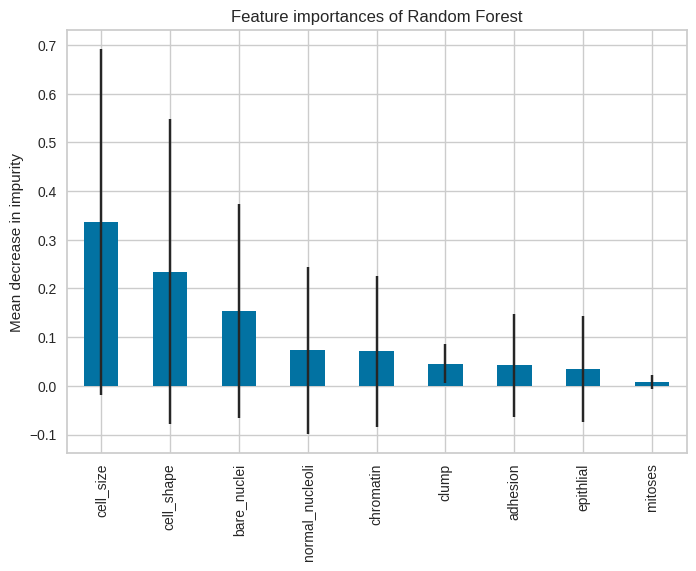

In [ ]:
df_feature_importance = pd.DataFrame({'importance': feature_importances, 'std': std})
df_feature_importance = df_feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
df_feature_importance.plot.bar(y = 'importance', yerr = 'std', ax = ax)
ax.set_title("Feature importances of Random Forest")
ax.set_ylabel("Mean decrease in impurity")
ax.legend([])
plt.show()

### Feature Importance 이용한 Feature Selection

In [ ]:
rf_selected = SelectFromModel(rf, prefit = True, threshold=0.01)
X_train_new = rf_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[rf_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 8)
Feature Names:  Index(['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli'],
      dtype='object')


### feature selection 데이터로 다시 모델 만들기

In [ ]:
X_train_new = pd.DataFrame(X_train_new, columns = feature_names)
X_test_new = X_test[feature_names]

In [ ]:
rf_modified = RandomForestClassifier(n_estimators=100, random_state=42)
rf_modified.fit(X_train_new, y_train)
print('테스트 점수:', rf_modified.score(X_test_new, y_test))

테스트 점수: 0.9658536585365853


## Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gbc.fit(X_train,y_train)
feature_importances = pd.Series(gbc.feature_importances_, index = X_train.columns)

print('테스트 점수:', gbc.score(X_test, y_test))

테스트 점수: 0.9560975609756097


### 시각화 - Feature Importance

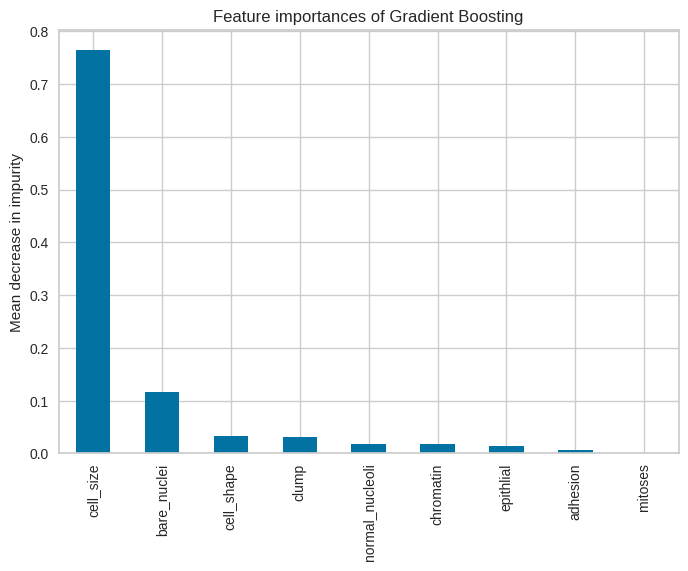

In [ ]:
df_feature_importance = pd.DataFrame({'importance': feature_importances})
df_feature_importance = df_feature_importance.sort_values('importance', ascending=False)
fig, ax = plt.subplots()
df_feature_importance.plot.bar(y = 'importance', ax = ax)
ax.set_title("Feature importances of Gradient Boosting")
ax.set_ylabel("Mean decrease in impurity")
ax.legend([])
plt.show()

### Feature Importance 이용한 Feature Selection

In [ ]:
gbc_selected = SelectFromModel(gbc, prefit = True, threshold=0.01)
X_train_new = gbc_selected.transform(X_train)

print('Shape of transformed Train set: ', X_train_new.shape)
feature_names = X_train.columns[gbc_selected.get_support()]
print('Feature Names: ', feature_names)

Shape of transformed Train set:  (478, 7)
Feature Names:  Index(['clump', 'cell_size', 'cell_shape', 'epithlial', 'bare_nuclei',
       'chromatin', 'normal_nucleoli'],
      dtype='object')


### feature selection 데이터로 다시 모델 만들기

In [ ]:
X_train_new = pd.DataFrame(X_train_new, columns = feature_names)
X_test_new = X_test[feature_names]

In [ ]:
gbc_modified = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_modified.fit(X_train_new, y_train)
print('테스트 점수:', gbc_modified.score(X_test_new, y_test))

테스트 점수: 0.9365853658536586


# 파이프라인

## 유방암 데이터

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [ ]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
label_encoder.classes_
# 양성, 악성

array(['B', 'M'], dtype=object)

In [ ]:
print(np.unique(y, return_counts=True))

(array([0, 1]), array([357, 212]))


In [ ]:
pd.Series(y).value_counts(normalize=True)

0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y, # 클래스 분포 비율 맞추기
                                                    random_state = 42)

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([285, 170]))
(array([0, 1]), array([72, 42]))


In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

0    0.626374
1    0.373626
Name: proportion, dtype: float64
0    0.631579
1    0.368421
Name: proportion, dtype: float64


## 파이프라인으로 변환기와 추정기 연결

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 3),
                        LogisticRegression(random_state = 42))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.947


## K-겹 교차 검증

In [ ]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    print("k =", k)
    print("train =", train)
    print("test =", test)

k = 0
train = [ 37  40  43  45  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 

In [ ]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y_train[train]), score))

print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [256 153], 정확도: 0.957
폴드:  2, 클래스 분포: [256 153], 정확도: 0.935
폴드:  3, 클래스 분포: [256 153], 정확도: 0.978
폴드:  4, 클래스 분포: [256 153], 정확도: 1.000
폴드:  5, 클래스 분포: [256 153], 정확도: 0.935
폴드:  6, 클래스 분포: [257 153], 정확도: 0.911
폴드:  7, 클래스 분포: [257 153], 정확도: 0.956
폴드:  8, 클래스 분포: [257 153], 정확도: 1.000
폴드:  9, 클래스 분포: [257 153], 정확도: 0.933
폴드: 10, 클래스 분포: [257 153], 정확도: 0.956

CV 정확도: 0.956 +/- 0.028


In [ ]:
scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.9565 0.9348 0.9783 1.     0.9348 0.9111 0.9556 1.     0.9333 0.9556]
CV 정확도: 0.956 +/- 0.028


In [ ]:
scores = cross_validate(estimator = pipe_lr, X = X_train, y = y_train, scoring=['accuracy'],
                        cv = 10, n_jobs = -1)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), np.std(scores['test_accuracy'])))

CV 정확도 점수: [0.9565 0.9348 0.9783 1.     0.9348 0.9111 0.9556 1.     0.9333 0.9556]
CV 정확도: 0.956 +/- 0.028


In [ ]:
# 스태킹(Stacking) 앙상블(Ensemble) 방법처럼 다른 모델에 주입할 훈련 데이터를 만들기 위해 사용
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          n_jobs=-1)
preds[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import cross_val_predict
preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          method='predict_proba',
                          n_jobs=-1)
preds[:10]

array([[0.3389, 0.6611],
       [0.9948, 0.0052],
       [0.9909, 0.0091],
       [0.0027, 0.9973],
       [0.0025, 0.9975],
       [0.    , 1.    ],
       [0.9922, 0.0078],
       [0.2069, 0.7931],
       [0.6504, 0.3496],
       [0.0004, 0.9996]])

## 오차 행렬

In [ ]:
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 5 37]]


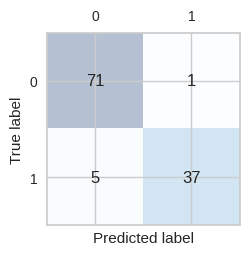

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

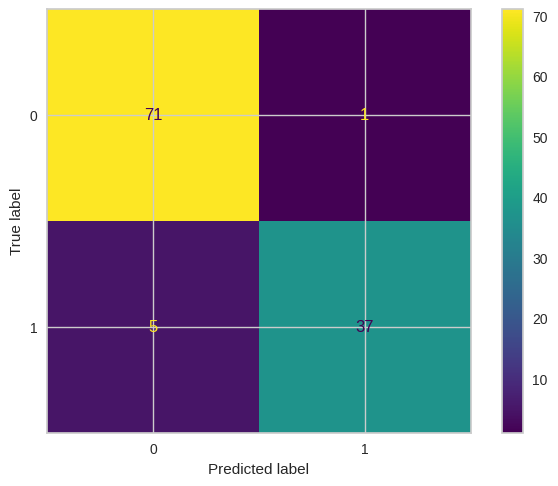

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test)
plt.show()

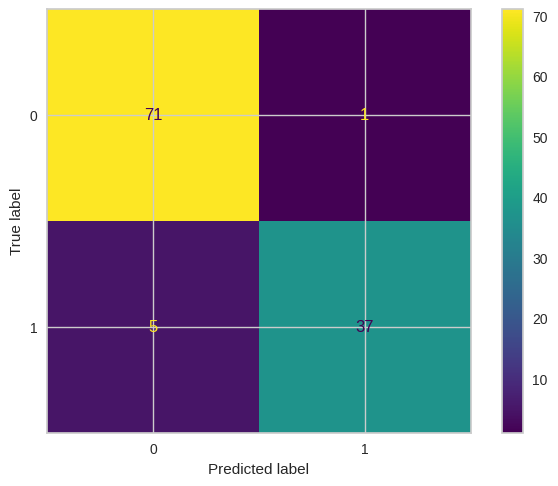

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

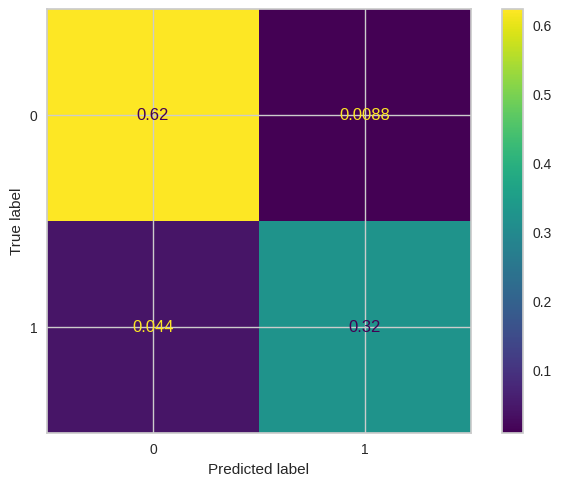

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_lr, X_test, y_test,
                                      normalize = 'all')
plt.savefig('./confusion_matrix_normalize.png', dpi=300)
plt.show()

# 불균형한 클래스 다루기

In [ ]:
print(X.shape)
print(X[y == 0].shape)
print(X[y == 1].shape)

(569, 30)
(357, 30)
(212, 30)


In [ ]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))
print(X_imb.shape)
print(y_imb.shape)

(397, 30)
(397,)


In [ ]:
y_imb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred = np.zeros(y_imb.shape[0])
y_pred.shape

(397,)

In [ ]:
((397 - 40) / 397) * 100

89.92443324937027

In [ ]:
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [ ]:
X_imb[y_imb == 1].shape[0]

40

In [ ]:
print(X_imb[y_imb == 1].shape)
print(y_imb[y_imb == 1].shape)

(40, 30)
(40,)


In [ ]:
X_imb[y_imb == 0].shape[0]

357

In [ ]:
print('샘플링하기 전 클래스 1의 샘플 개수:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace = True,
                                    n_samples = X_imb[y_imb == 0].shape[0],
                                    random_state = 42)

print('샘플링하기 후 클래스 1의 샘플 개수:', X_upsampled.shape[0])

샘플링하기 전 클래스 1의 샘플 개수: 40
샘플링하기 후 클래스 1의 샘플 개수: 357


In [ ]:
print(X[y == 0].shape)
print(X_upsampled.shape)

(357, 30)
(357, 30)


In [ ]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [ ]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

# Optuna

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
import optuna

## 목적 함수

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 0.0000000001, 10000000000, log=True)
        classifier_obj = svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_float('rf_max_depth', 2, 32, log=True))
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    accuracy = cross_val_score(classifier_obj, X_train, y_train, cv = 5).mean()
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-04-30 05:11:00,577] A new study created in memory with name: no-name-32b71565-fd56-4920-8011-a0651d5e6e6c
[I 2024-04-30 05:11:00,659] Trial 0 finished with value: 0.6263736263736264 and parameters: {'classifier': 'SVC', 'svc_c': 0.0007886130061959962}. Best is trial 0 with value: 0.6263736263736264.
[I 2024-04-30 05:11:00,789] Trial 1 finished with value: 0.9692307692307693 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 7.950498498575321}. Best is trial 1 with value: 0.9692307692307693.
[I 2024-04-30 05:11:00,910] Trial 2 finished with value: 0.945054945054945 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 3.194451908077878}. Best is trial 1 with value: 0.9692307692307693.
[I 2024-04-30 05:11:01,012] Trial 3 finished with value: 0.6263736263736264 and parameters: {'classifier': 'SVC', 'svc_c': 7935092.958731182}. Best is trial 1 with value: 0.9692307692307693.
[I 2024-04-30 05:11:01,136] Trial 4 finished with value: 0.9494505494505494 and paramet

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
print(optuna_acc)

{'classifier': 'RandomForest', 'rf_max_depth': 7.950498498575321}
0.9692307692307693


In [ ]:
# Optuna 내장 시각화 코드
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인 = 매 trial 마다 loss 가 어떻게 감소되었는지 확인
optuna.visualization.plot_optimization_history(study)

In [ ]:
def objective(trial):
  params = {
            'max_depth': trial.suggest_int('max_depth', 2, 50),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 100),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 100),
            'n_estimators': trial.suggest_int('n_estimators', 10, 20)
          }

  model = RandomForestClassifier(n_jobs=-1, random_state=42,
                                 **params)

  model.fit(X_train, y_train)
  score = cross_val_score(model, X_train, y_train, cv=10, scoring = "accuracy")
  score_mean = score.mean()
  return score_mean

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2024-04-30 05:16:39,849] A new study created in memory with name: no-name-c95de1a0-7273-4d57-b31c-5ded0d70388f
[I 2024-04-30 05:16:41,598] Trial 0 finished with value: 0.9316908212560386 and parameters: {'max_depth': 15, 'min_samples_leaf': 56, 'min_samples_split': 92, 'n_estimators': 17}. Best is trial 0 with value: 0.9316908212560386.
[I 2024-04-30 05:16:43,352] Trial 1 finished with value: 0.9359420289855074 and parameters: {'max_depth': 42, 'min_samples_leaf': 29, 'min_samples_split': 20, 'n_estimators': 20}. Best is trial 1 with value: 0.9359420289855074.
[I 2024-04-30 05:16:44,600] Trial 2 finished with value: 0.9097101449275364 and parameters: {'max_depth': 8, 'min_samples_leaf': 98, 'min_samples_split': 96, 'n_estimators': 17}. Best is trial 1 with value: 0.9359420289855074.
[I 2024-04-30 05:16:45,425] Trial 3 finished with value: 0.9294202898550725 and parameters: {'max_depth': 44, 'min_samples_leaf': 47, 'min_samples_split': 91, 'n_estimators': 13}. Best is trial 1 with va

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_acc = study.best_trial.value
print(optuna_acc)

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 20}
0.9603381642512078


In [ ]:
# Optuna 내장 시각화 코드
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인 = 매 trial 마다 loss 가 어떻게 감소되었는지 확인
optuna.visualization.plot_optimization_history(study)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
def objective(trial):
    params = {
            'learning_rate': trial.suggest_float("learning_rate", 0.01, 1.0, log=True),
            'reg_lambda': trial.suggest_loguniform("reg_lambda", 1e-9, 100.0),
            'reg_alpha': trial.suggest_loguniform("reg_alpha", 1e-9, 100.0),
            'subsample': trial.suggest_float("subsample", 0.1, 1.0),
            'colsample_bytree': trial.suggest_float("colsample_bytree", 0.1, 1.0),
            'max_depth': trial.suggest_int("max_depth", 1, 7),
            'min_child_weight': trial.suggest_int("min_child_weight", 1, 7),
            'gamma': trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
    }

    model = XGBRegressor(
        random_state=0,
        tree_method="hist",
        n_estimators=100,
        **params,
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)

    return rmse

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2024-04-30 07:02:32,526] A new study created in memory with name: no-name-87ee8362-eca6-4577-a246-f2619ac33ab2
[I 2024-04-30 07:02:33,213] Trial 0 finished with value: 0.21977274890498577 and parameters: {'learning_rate': 0.7091438395564165, 'reg_lambda': 0.020291465868799503, 'reg_alpha': 6.21408831591434e-06, 'subsample': 0.5847395827113714, 'colsample_bytree': 0.24500860172156064, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 0.1}. Best is trial 0 with value: 0.21977274890498577.
[I 2024-04-30 07:02:34,053] Trial 1 finished with value: 0.23438212735349315 and parameters: {'learning_rate': 0.011092702191245656, 'reg_lambda': 6.838394382737513e-06, 'reg_alpha': 3.243789048827475e-06, 'subsample': 0.5949855123019133, 'colsample_bytree': 0.764081015578433, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.5}. Best is trial 0 with value: 0.21977274890498577.
[I 2024-04-30 07:02:34,693] Trial 2 finished with value: 0.18739393257156675 and parameters: {'learning_rate': 0.1575887944981

In [ ]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드
optuna_rmse = study.best_trial.value
print(optuna_rmse)

{'learning_rate': 0.27850237544791034, 'reg_lambda': 14.37327032538903, 'reg_alpha': 2.1697982334681488e-07, 'subsample': 0.2637587899781258, 'colsample_bytree': 0.47759678287584145, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.5}
0.15665998229164463


In [ ]:
# Optuna 내장 시각화 코드
# 하이퍼파라미터별 중요도를 확인할 수 있는 그래프
optuna.visualization.plot_param_importances(study)

In [ ]:
# 하이퍼파라미터 최적화 과정을 확인 = 매 trial 마다 loss 가 어떻게 감소되었는지 확인
optuna.visualization.plot_optimization_history(study)

# 제조 데이터 분석 사례

## 핀성형기의 가동 상태 탐지 - 이진 분류

### 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

### 데이터 셋 불러오기

In [ ]:
# 첫번째 열을 행 인덱스로 설정
df = pd.read_csv("/content/drive/MyDrive/lsda02/data/pin.csv",index_col = 0)
df.head()

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158400 entries, 0 to 158399
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MAKING1_START       158400 non-null  int64  
 1   MAKING1_STOP        158400 non-null  int64  
 2   MAKING1_CNT         158400 non-null  float64
 3   MAKING1_VOLT_A      158400 non-null  float64
 4   MAKING1_VOLT_B      158400 non-null  float64
 5   MAKING1_VOLT_C      158400 non-null  float64
 6   MAKING1_VOLT_AVG    158400 non-null  float64
 7   MAKING1_CURR_A      158400 non-null  float64
 8   MAKING1_CURR_B      158400 non-null  float64
 9   MAKING1_CURR_C      158400 non-null  float64
 10  MAKING1_CURR_AVG    158400 non-null  float64
 11  MAKING1_KW          158400 non-null  float64
 12  MAKING1_KVAR        158400 non-null  float64
 13  MAKING1_HZ          158400 non-null  float64
 14  MAKING1_PWR_FACTOR  158400 non-null  float64
 15  MAKING1_KWH         158400 non-null  fl

In [ ]:
df['MAKING1_START'].value_counts()

MAKING1_START
1    82751
0    75649
Name: count, dtype: int64

In [ ]:
df['MAKING1_STOP'].value_counts()

MAKING1_STOP
0    90745
1    67655
Name: count, dtype: int64

## EDA

In [ ]:
# 자동화 전략
# EDA 상세내용


## AutoML

In [ ]:
# 분석 모델 탐색용


## 모델 훈련 및 평가

In [ ]:
# 전처리
# 모델 훈련 및 평가
# 하이퍼파라미터 튜닝
# ...

### 데이터 분할

In [ ]:
df.columns

Index(['MAKING1_START', 'MAKING1_STOP', 'MAKING1_CNT', 'MAKING1_VOLT_A',
       'MAKING1_VOLT_B', 'MAKING1_VOLT_C', 'MAKING1_VOLT_AVG',
       'MAKING1_CURR_A', 'MAKING1_CURR_B', 'MAKING1_CURR_C',
       'MAKING1_CURR_AVG', 'MAKING1_KW', 'MAKING1_KVAR', 'MAKING1_HZ',
       'MAKING1_PWR_FACTOR', 'MAKING1_KWH', 'MAKING1_KVARH'],
      dtype='object')

In [ ]:
X = df.iloc[:, 2:].values
# 종속변수 = START(ON/OFF)
y_start = df.iloc[:,0].values
# 종속변수 = STOP(ON/OFF)
y_stop = df.iloc[:,1].values

print("input 데이터: ", X.shape)
print("target 데이터: ", y_start.shape)
print("target 데이터: ", y_stop.shape)
print("input 데이터: ", X[:5])
print("target 데이터: ", y_start[:5])
print("target 데이터: ", y_stop[:5])

input 데이터:  (158400, 15)
target 데이터:  (158400,)
target 데이터:  (158400,)
input 데이터:  [[19978.6794   118.0348   119.514    118.0256   118.2922     0.7704
      0.1553     0.7352     0.5455     0.1759     0.0434    32.9917
     34.6953   899.8489   428.1774]
 [19978.6794   118.0348   119.514    118.0256   118.2922     0.7704
      0.1553     0.7352     0.5455     0.1759     0.0434    32.9917
     34.6953   899.8489   428.1774]
 [19978.6794   118.0826   119.533    118.0585   118.6541     0.7595
      0.1429     0.7426     0.5455     0.1759     0.0434    32.9917
     34.4417   899.8489   428.1774]
 [19978.6794   117.9101   119.353    117.8786   118.5138     0.7563
      0.1514     0.7381     0.5477     0.1759     0.0434    32.9917
     34.7128   899.8489   428.1774]
 [19978.6794   117.8585   119.787    117.2587   118.5076     0.7679
      0.1656     0.7392     0.5542     0.1759     0.0434    32.9917
     34.4549   899.8489   428.1774]]
target 데이터:  [1 1 1 1 1]
target 데이터:  [0 0 0 0 0]


### 종속변수 = START(ON/OFF) 모델

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y_start,
                                                  test_size = 0.3,
                                                  random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)
print("train 데이터: ", X_train[:5])
print("test 데이터: ", X_test[:5])

train 데이터:  (110880, 15)
test 데이터:  (47520, 15)
train 데이터:  [[36917.1728   119.6842   120.5116   119.3968   120.2132     0.7091
      0.0289     0.751      0.4961     0.154      0.0374    32.9917
     31.1612   931.4109   443.8485]
 [20563.7324   119.6246   120.7009   119.175    119.6848     1.8553
      1.4602     2.663      1.9846     0.6026     0.3321    32.9917
     38.96     901.4435   429.0022]
 [23303.144    119.8667   120.8897   119.6242   120.2252     0.3936
      0.0523     0.4424     0.2942     0.0731     0.0495    32.895
     25.2662   909.5814   433.0711]
 [30783.4642   116.8153   118.3675   116.8587   117.4963     0.8312
      0.1012     0.8435     0.5885     0.1892     0.0374    32.8958
     33.8633   919.094    437.9649]
 [36917.1728   120.1774   121.4382   119.8166   120.4078     0.7112
      0.0549     0.7473     0.5026     0.154      0.0415    32.9917
     30.7483   931.4109   443.8485]]
test 데이터:  [[25750.579    120.1391   120.6729   120.2913   119.9434     0.4096
 

#### XG부스트 분류

In [ ]:
xgb = XGBClassifier(learning_rate=0.0001, objective = 'reg:squarederror')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

In [ ]:
y_test_pred = xgb.predict(X_test)

In [ ]:
y_test_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[    0 22741]
 [    0 24779]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22741
           1       0.52      1.00      0.69     24779

    accuracy                           0.52     47520
   macro avg       0.26      0.50      0.34     47520
weighted avg       0.27      0.52      0.36     47520



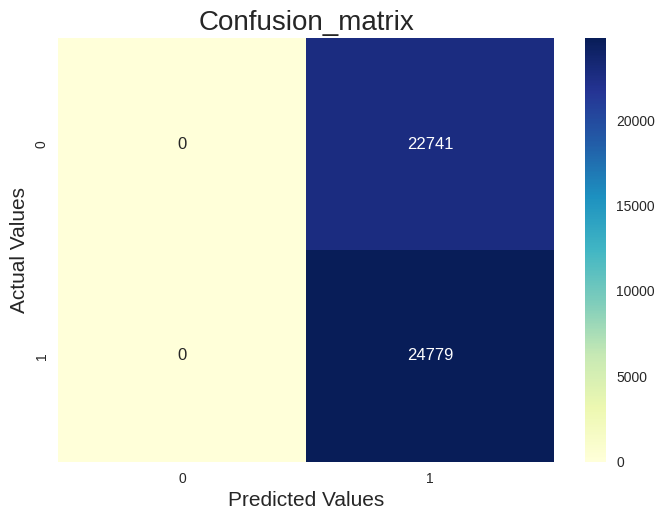

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot = True,
            fmt = ".0f",
            cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("TN, FP, FN, TP:", tn, fp, fn, tp)

TN, FP, FN, TP: 0 22741 0 24779


In [ ]:
print('accuracy', accuracy_score(y_test, y_test_pred))
print('precision', precision_score(y_test, y_test_pred))
print('recall', recall_score(y_test, y_test_pred))
print('f1', f1_score(y_test, y_test_pred))

accuracy 0.5214436026936027
precision 0.5214436026936027
recall 1.0
f1 0.6854589966666206


## 최종 모델 제출

In [ ]:
# 전체 훈련 데이터로 훈련 후 테스트 데이터로 평가
# 최종 점수 제출
# XAI SHAP 가능한 모델이라면 그림과 함께 설명 / 다른 모델이라도 설명이 가능하면 서술할 것!
